# Setup

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import matplotlib.pyplot as plt

# Exercises

## 1. 
What is the fundamental idea behind Support Vector Machines?


The fundamental idea behind Support Vector Machines is to fit the widest possi‐
ble “street” between the classes. In other words, the goal is to have the largest pos‐
sible margin between the decision boundary that separates the two classes and
the training instances. When performing soft margin classification, the SVM
searches for a compromise between perfectly separating the two classes and hav‐
ing the widest possible street (i.e., a few instances may end up on the street).
Another key idea is to use kernels when training on nonlinear datasets.

## 2. 
What is a support vector?


After training an SVM, a support vector is any instance located on the “street” (see
the previous answer), including its border. The decision boundary is entirely
determined by the support vectors. Any instance that is not a support vector (i.e.,
is off the street) has no influence whatsoever; you could remove them, add more
instances, or move them around, and as long as they stay off the street they won’t
affect the decision boundary. Computing the predictions only involves the sup‐
port vectors, not the whole training set.

## 3. 
Why is it important to scale the inputs when using SVMs?


SVMs try to fit the largest possible “street” between the classes (see the first
answer), so if the training set is not scaled, the SVM will tend to neglect small
features (see Figure 5-2).

## 4. 
Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?


An SVM classifier can output the distance between the test instance and the deci‐
sion boundary, and you can use this as a confidence score. However, this score
cannot be directly converted into an estimation of the class probability. If you set
probability=True when creating an SVM in Scikit-Learn, then after training it
will calibrate the probabilities using Logistic Regression on the SVM’s scores
(trained by an additional five-fold cross-validation on the training data). This
will add the predict_proba() and predict_log_proba() methods to the SVM.

## 5. 
Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?


This question applies only to linear SVMs since kernelized SVMs can only use
the dual form. The computational complexity of the primal form of the SVM
problem is proportional to the number of training instances m, while the compu‐
tational complexity of the dual form is proportional to a number between m2 and
m3. So if there are millions of instances, you should definitely use the primal
form, because the dual form will be much too slow.

## 6. 
Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?


If an SVM classifier trained with an RBF kernel underfits the training set, there
might be too much regularization. To decrease it, you need to increase gamma or C
(or both).

## 7. 
How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?


## 8. 
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


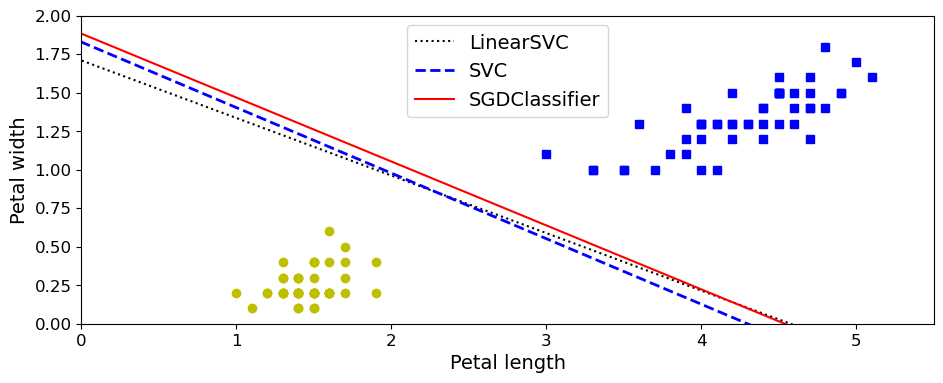

In [5]:

# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## 9. 
Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?


In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:] 
y_test = y[60000:] 

### Linear SVC

In [9]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/home/fanpeng/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [13]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/home/fanpeng/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [14]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

### SVM with RBF Kernel

In [15]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [16]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

### Hyperparameter Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=8.965429868602328, gamma=0.002327392228062871; total time=   0.5s
[CV] END ....C=8.965429868602328, gamma=0.002327392228062871; total time=   0.4s
[CV] END ....C=8.965429868602328, gamma=0.002327392228062871; total time=   0.4s
[CV] END ....C=8.796910002727692, gamma=0.015620693675639861; total time=   0.6s
[CV] END ....C=8.796910002727692, gamma=0.015620693675639861; total time=   0.6s
[CV] END ....C=8.796910002727692, gamma=0.015620693675639861; total time=   0.5s
[CV] END ...C=5.458327528535912, gamma=0.0015847101210439089; total time=   0.4s
[CV] END ...C=5.458327528535912, gamma=0.0015847101210439089; total time=   0.4s
[CV] END ...C=5.458327528535912, gamma=0.0015847101210439089; total time=   0.4s
[CV] END ....C=5.592488919658671, gamma=0.004649617447336332; total time=   0.5s
[CV] END ....C=5.592488919658671, gamma=0.004649617447336332; total time=   0.5s
[CV] END ....C=5.592488919658671, gamma=0.004649

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f62b5556dc0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f62b75f04c0>},
                   verbose=2)

In [18]:
rnd_search_cv.best_estimator_

SVC(C=7.116531604882809, gamma=0.0010330768043240405)

In [19]:
rnd_search_cv.best_score_

0.8639897382412353

In [20]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=7.116531604882809, gamma=0.0010330768043240405)

In [21]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9972833333333333

In [22]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9718

## 10. 
Train an SVM regressor on the California housing dataset.

In [23]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/home/fanpeng/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [28]:

np.sqrt(mse)

0.9819256687727764

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  11.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.6s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   9.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   9.6s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   8.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   9.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f62b501e460>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f62b87db8b0>},
                   random_state=42, verbose=2)

In [30]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [31]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

In [32]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874